# Dirichlet distribution

ref1: https://builtin.com/data-science/dirichlet-distribution

ref2: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dirichlet.html

## WHAT IS THE DIRICHLET DISTRIBUTION?
The Dirichlet distribution Dir($\alpha$) is a family of continuous multivariate probability distributions parameterized by a vector $\alpha$ of positive reals. It is a multivariate generalization of the Beta distribution. Dirichlet distributions are commonly used as prior distributions in Bayesian statistics.

狄利克雷分布是Beta分布的多变量推广，通常用作贝叶斯统计中的先验分布。


## Dirichlet Distribution

The Dirichlet distribution defines a probability density for a vector valued input having the same characteristics as our multinomial parameter θ. It has support (the set of points where it has non-zero values) over $x_1,x_2,...,x_k$ where $x_i \in (0,1)$ and $\sum\limits_{i=1}\limits^{K}x_i = 1$. K is the number of variables. Its probability density function has the following form:
$$Dir(\theta|\mathbb{\alpha}) = \frac{1}{Beta(\mathbb{\alpha})} \prod\limits_{i=1}\limits^{K}\theta_i^{\alpha_i-1}$$
where, $Beta(\mathbb{\alpha}) = \frac{\prod_{i=1}^{K}\Gamma(\alpha_i)}{\Gamma(\sum_{i=1}^{K}\alpha_i)}$

The Dirichlet distribution is parameterized by the vector $\mathbb{\alpha}$, the concentration parameters , which has the same number of elements K as our multinomial parameter $\theta$. So you can interpret $p(\theta|\alpha)$ as the answer to the question “what is the probability density associated with multinomial distribution θ, given that our Dirichlet distribution has parameter α?”

In [1]:
import numpy as np
from scipy.stats import dirichlet

In [4]:
# Note that the dirichlet interface is somewhat inconsistent. 
# The array returned by the rvs function is transposed with respect to the format expected by the pdf and logpdf.

# Generate a dirichlet random variable
quantiles = np.array([0.2, 0.2, 0.6])  # specify quantiles
alpha = np.array([0.4, 5, 15])  # specify concentration parameters
print(dirichlet.pdf(quantiles, alpha))

# The same PDF but following a log scale
print(dirichlet.logpdf(quantiles, alpha))

# Once we specify the dirichlet distribution we can then calculate quantities of interest
print(dirichlet.mean(alpha))  # get the mean of the distribution
print(dirichlet.var(alpha)) # get variance
print(dirichlet.entropy(alpha))  # calculate the differential entropy

0.2843831684937255
-1.2574327653159187
[0.01960784 0.24509804 0.73529412]
[0.00089829 0.00864603 0.00909517]
-4.3280162474082715


In [8]:
# Sampling from the distribution
print(dirichlet.rvs(alpha, size=1, random_state=1))
print(dirichlet.rvs(alpha, size=2, random_state=2))

# Alternatively, the object may be called (as a function) to fix concentration parameters, 
# returning a “frozen” Dirichlet random variable:
rv = dirichlet(alpha)
# Frozen object with the same methods but holding the given
# concentration parameters fixed.
print(rv.rvs(size=3))
print(rv.mean())

[[0.00766178 0.24670518 0.74563305]]
[[0.01639427 0.1292273  0.85437844]
 [0.00156917 0.19033695 0.80809388]]
[[1.04944993e-01 1.74598855e-01 7.20456152e-01]
 [3.47622064e-02 1.98227296e-01 7.67010498e-01]
 [9.93251252e-05 3.34364633e-01 6.65536042e-01]]
[0.01960784 0.24509804 0.73529412]


## Why use Dirichlet distribution as a prior distribution?
An immediate question is why do we use the Dirichlet distribution as a prior distribution in Bayesian statistics? One reason is that it’s the conjugate prior to two important probability distributions: the categorical distribution and the multinomial distribution. In short, using the Dirichlet distribution as a prior makes the math a lot easier.

原因在于狄利克雷分布是两种重要的分布（分类分布和多项式分布）的共轭先验（conjugate prior），使用狄利克雷分布作为先验分布会使得数学处理变得更简单一些。

## Conjugate Prior
In Bayesian probability theory, if the posterior distribution p(θ|x) and the prior distribution p(θ) are from the same probability distribution family, then the prior and posterior are called conjugate distributions, and the prior is the conjugate prior for the likelihood function.

If we think about the problem of inferring the parameter θ for a distribution from a given set of data x, then Bayes’ theorem says the posterior distribution is equal to the product of the likelihood function θ → p(x|θ) and the prior p(θ), normalized by the probability of the data p(x): $$p(\theta|\mathcal{x}) = \frac{p(\mathcal{x}|\theta) p(\theta)}{\int p(\mathcal{x}|\theta') p(\theta') d\theta'}$$

Since the likelihood function is usually defined from the data generating process, the difference choices of prior can make the integral more or less difficult to calculate. If the prior has the same algebraic form as the likelihood, then often we can obtain a closed-form expression for the posterior, avoiding the need of numerical integration.

简而言之，如果似然函数与先验概率具有相同的代数形式，通常就可以得到后验概率的闭式表达式，避免数值积分的必要性。

## Motivating the Dirichlet Distribution
Here’s how the Dirichlet distribution can be used to characterize the random variability of a multinomial distribution. I’ve borrowed this example from a great blog post on visualizing the Dirichlet distribution.

Suppose we’re going to manufacture six-sided dice but allow the outcomes of a toss to be only one, two or three (so the later visualization is easier). If the die is fair then the probabilities of the three outcomes will be the same and equal to 1/3. We can represent the probabilities for the outcomes as a vector θ =(θ₁, θ₂, θ₃).

θ has two important properties: First, the sum of the probabilities for each entry must equal one, and none of the probabilities can be negative. When these conditions hold, we can use a multinomial distribution to describe the results associated with rolling the die.

In other words, if we observe n dice rolls, D={x₁,…,x_k}, then the likelihood function has the form:
$$p(\mathcal{D}|\theta) = \prod\limits_{k=1}\limits^{3}\theta_k^{N_k},\ N_k=\sum\limits_{i=1}\limits^{N}I(y_i=k)$$

Where $N_k$ is the number of times the value $k\in{1, 2, 3}$ has occurred.

We expect there will be some variability in the characteristics of the dice we produce, so even if we try to produce fair dice, we won’t expect the probabilities of each outcome for a particular die will be exactly 1/3, due to variability in the production process. To characterize this variability mathematically, we would like to know the probability density of every possible value of θ for a given manufacturing process. To do this, let’s consider each element of θ as being an independent variable.

That is, for θ =(θ₁, θ₂, θ₃), we can treat θ₁, θ₂ and θ₃ each as an independent variable. Since the multinomial distribution requires that these three variables sum to one, we know that the allowable values of θ are confined to a plane. Furthermore, since each value θᵢ must be greater than or equal to zero, the set of all allowable values of θ is confined to a triangle.

What we want to know is the probability density at each point on this triangle. This is where the Dirichlet distribution can help us: We can use it as the prior for the multinomial distribution.

## Visualizing the Dirichlet Distribution
We see the Dirichlet distribution indeed has the same form as the multinomial likelihood distribution. But what does it actually look like?

To see this, we need to note that the Dirichlet distribution is the multivariate generalization of the beta distribution. The beta distribution is defined on the interval [0, 1] parameterized by two positive shape parameters α and β. As you might expect, it is the conjugate prior of the binomial (including Bernoulli) distribution. The figure shows the probability density function for the Beta distribution with a few α and β values.

As we can see, the beta density function can take a wide variety of different shapes depending on α and β. When both α and β are less than one, the distribution is U-shaped. In the limit of α = β → 0, it is a  two point Bernoulli distribution with equal probability 1/2 at each Dirac delta function ends x=0 and x=1, and zero probability everywhere else. When α=β=1 we have the uniform [0, 1] distribution, which is the distribution with the largest entropy. When both α and β are greater than one the distribution is unimodal. This diversity of shapes by varying only two parameters makes it particularly useful for modeling actual measurements.

For the Dirichlet distribution Dir(α) we generalize these shapes to a K simplex. For K=3, visualizing the distribution requires us to do the following: 

1. Generate a set of x-y coordinates over our triangle 

2. Map the x-y coordinates to the two-simplex coordinate space

3. Compute Dir(α) for each point 

Below are some examples.

We see it’s now the parameter α that governs the shapes of the distribution. In particular, the sum α₀=∑αᵢ controls the strength of the distribution (how peaked it is). If αᵢ < 1 for all i, we get spikes at the corners of the simplex. For values of αᵢ > 1, the distribution tends toward the centre of the simplex. As α₀ increases, the distribution becomes more tightly concentrated around the centre of the simplex.

In the context of our original dice experiment, we would produce consistently fair dice as αᵢ → ∞. For a symmetric Dirichlet distribution with αᵢ > 1, we will produce fair dice, on average. If the goal is to produce loaded dice (e.g., with a higher probability of rolling a three), we would want an asymmetric Dirichlet distribution with a higher value for α₃.

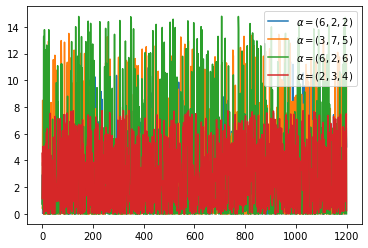

In [12]:
"""
    3-Class Example
"""
from random import randint
import numpy as np
from matplotlib import pyplot as plt

def normalization(x, s):
    """
    :return: normalizated list, where sum(x) == s
    """
    return [(i * s) / sum(x) for i in x]

def sampling():
    return normalization([randint(1, 100),
            randint(1, 100), randint(1, 100)], s=1)

def gamma_function(n):
    cal = 1
    for i in range(2, n):
        cal *= i
    return cal

def beta_function(alpha):
    """
    :param alpha: list, len(alpha) is k
    :return:
    """
    numerator = 1
    for a in alpha:
        numerator *= gamma_function(a)
    denominator = gamma_function(sum(alpha))
    return numerator / denominator

def dirichlet(x, a, n):
    """
    :param x: list of [x[1,...,K], x[1,...,K], ...], shape is (n_trial, K)
    :param a: list of coefficient, a_i > 0
    :param n: number of trial
    :return:
    """
    c = (1 / beta_function(a))
    y = [c * (xn[0] ** (a[0] - 1)) * (xn[1] ** (a[1] - 1))
         * (xn[2] ** (a[2] - 1)) for xn in x]
    x = np.arange(n)
    return x, y, np.mean(y), np.std(y)

n_experiment = 1200
for ls in [(6, 2, 2), (3, 7, 5), (6, 2, 6), (2, 3, 4)]:
    alpha = list(ls)

    # random samping [x[1,...,K], x[1,...,K], ...], shape is (n_trial, K)
    # each sum of row should be one.
    x = [sampling() for _ in range(1, n_experiment + 1)]

    x, y, u, s = dirichlet(x, alpha, n=n_experiment)
    plt.plot(x, y, label=r'$\alpha=(%d,%d,%d)$' % (ls[0], ls[1], ls[2]))

plt.legend()
plt.savefig('graph/dirichlet.png')
plt.show()